<a href="https://colab.research.google.com/github/V4lciJr/Algoritmo-NaiveBayes/blob/main/Naive_Bayes_Cogumelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes
um método de classificação muito simples, mas poderoso. Para um determinado objeto x, Naive Bayes calcula a probabilidade de x pertencer a cada
classe yi (i = 1, ⋯, k), usando o teorema de Bayes:

P (yi| x) = P(yi) P(x1, ⋯, xm| yi) / P (x1, ⋯, xm)

Além disso, assume que os recursos são independentes uns dos outros (razão pela qual é chamado de Bayes).



In [ ]:
# instalando o repositório da base de dados
!pip install ucimlrepo

In [ ]:
# importando a base e as bibliotecas necessárias
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, roc_curve, auc
from ucimlrepo import fetch_ucirepo

cogumelos = fetch_ucirepo(id=73)

# definindo a semente aleatório
seed = 10

df = pd.DataFrame(cogumelos.data.features)
label = cogumelos.data.targets

df['label'] = label
df.head()



,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,label
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e


Pesquisando, li em um artigo que o scikit-learn não implementa o algoritmo clássico Naive Bayes, porém, o scikit-learn contém o BernoulliNB
classe que assume que os dados são distribuídos de acordo com distribuições multivariadas de Bernoulli.
Portanto, para o conjunto de dados Cogumelos, podemos transformar cada recurso categórico em variáveis ​​fictícias, mas com essa conversão claramente
violamos a suposição de independência entre recursos. No entanto, foi comprovado que Naive Bayes alcança um bom desempenho em
diversas aplicações onde a independência é violada (por exemplo, na classificação de textos).

In [ ]:
# criando variáveis binárias de acordo com a variável alvo
dummies = [pd.get_dummies(df[c]) for c in df.drop('label', axis=1).columns]

# concatenando os dados com as variáveis dummies
dados_binarios = pd.concat(dummies, axis=1)

X = dados_binarios.values
X

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
# Obtendo os rótulos
le = LabelEncoder()
y = le.fit_transform(df['label'].values)
y

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
# dividindo o conjunto de dados binários em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=seed)

# utilizando a classe Bernoulli e indicando que não se faz necessário binarizar os dados
nb = BernoulliNB(binarize=None)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acc}')

Acurácia: 0.9419005416051206


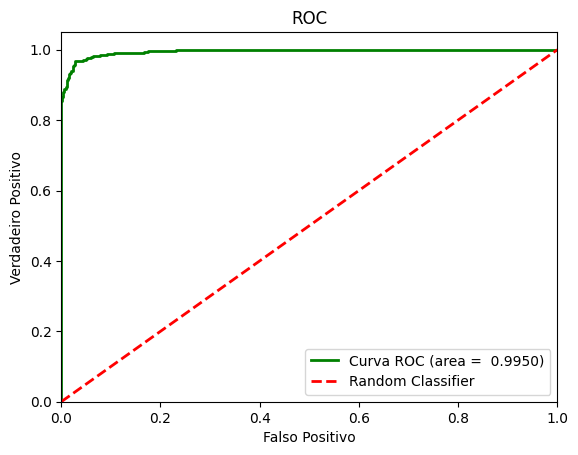

In [ ]:
# Obtendo as probabilidades de cada classe
y_prob = nb.predict_proba(X_test)

# calcucando a curva ROC e ROC AUC
falso_positivo, verdadeiro_positivo, limite = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(falso_positivo, verdadeiro_positivo)

# plotando o gráfico
lw = 2
plt.plot(falso_positivo, verdadeiro_positivo, color='green', lw=lw, label=f'Curva ROC (area = {roc_auc: .4f})')
plt.plot([0,1], [0,1], color='red', lw=lw, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()